In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Prática I - 09/10/2023

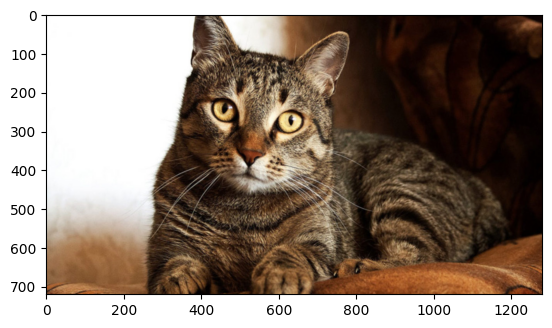

In [2]:
img_bgr = cv2.imread('cat.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [3]:
# Criando uma janela no Jupyter-lab
# cv2.imshow('Gatinho', img_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

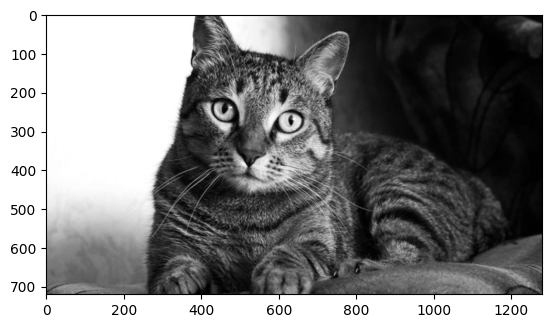

In [4]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

In [5]:
_ = cv2.imwrite('cat_gray.jpg', gray)

# Prática II - 23/10/2023

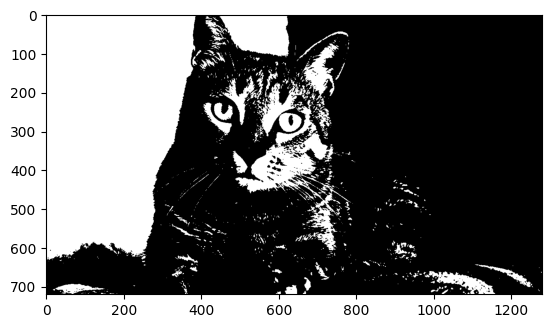

In [6]:
_, bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bin, cmap='gray')

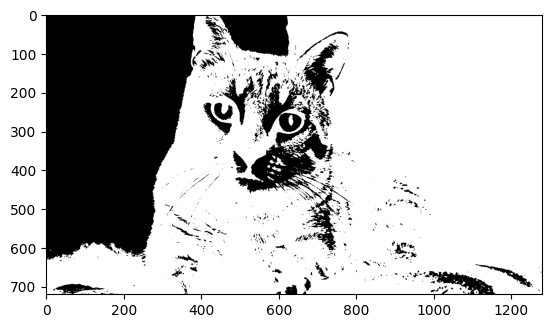

In [7]:
_, bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bin, cmap='gray')

In [8]:
# Janela com sliders para testar diferentes parâmetros de limiarização
# !python pratica_2.py

# Prática - Extração de Características (20/11/2023)

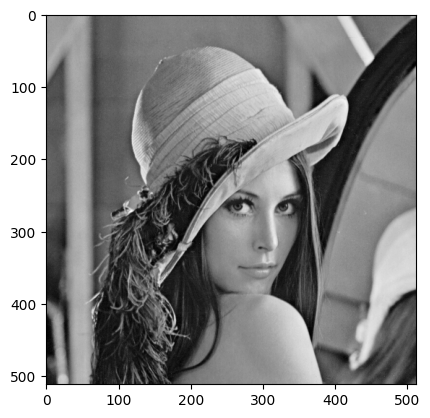

In [9]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

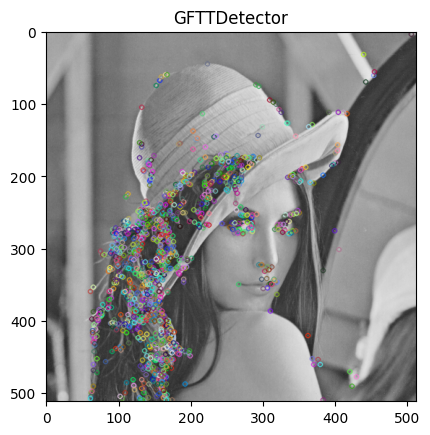

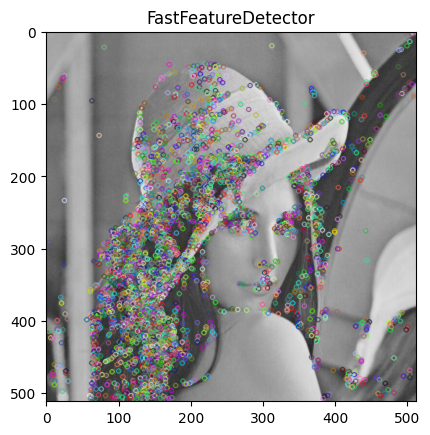

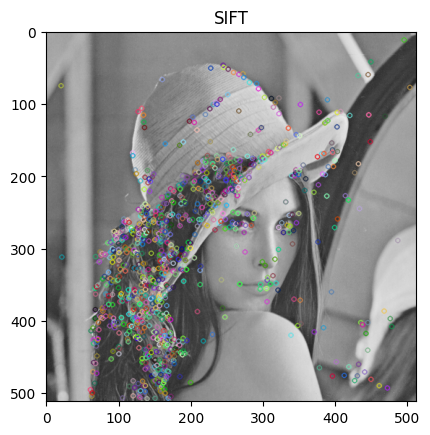

In [10]:
for d in [cv2.GFTTDetector_create, 
          cv2.FastFeatureDetector_create,
          cv2.SIFT_create]:
    detector = d()
    keypoints = detector.detect(img)
    res = cv2.drawKeypoints(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), keypoints, None)
    plt.figure()
    plt.title(d.__name__.split('_')[0])
    plt.imshow(res)

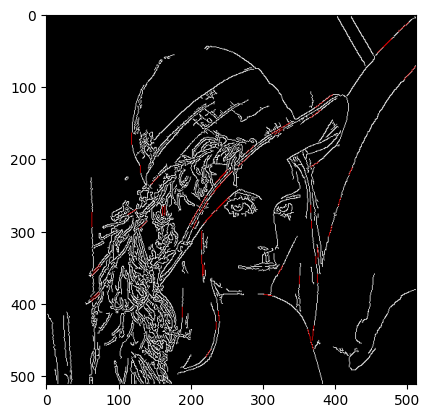

In [11]:
# Transformada de Hough Probabilística
edges = cv2.Canny(img, 50, 200, 3)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, 50, 10)
for l in lines:
    l = l[0]
    cv2.line(edges_rgb, 
             (l[0], l[1]), 
             (l[2], l[3]), 
             (255, 0, 0))
plt.imshow(edges_rgb)

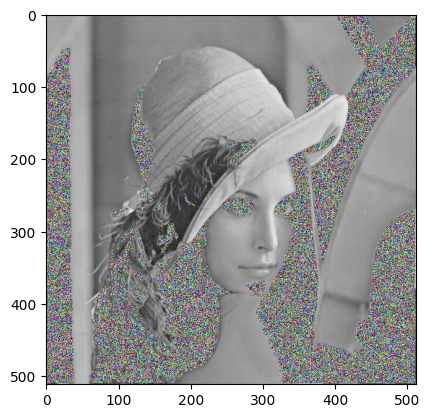

In [12]:
mser = cv2.MSER_create()
cnt, bb = mser.detectRegions(img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
np.random.seed(2)
for i in range(len(cnt)):
    for j in range(len(cnt[i])):
        cv2.circle(img_rgb, cnt[i][j], 0, np.random.uniform(0, 255, size=3))
plt.imshow(img_rgb)